In [1]:
#!/usr/bin/env
#
# author: Brad Carruthers
# author_mail: brad@securewealth.co.za

In [2]:
import logging
import pandas as pd
from datetime import date

logging.basicConfig(level=logging.INFO, filename='notebook.log', filemode='w', format='%(name)s - %(levelname)s - %(message)s')

## Block A

In [3]:
logging.info("Reading in activities.csv")
df_acts = pd.read_csv("../data/activities.csv", sep=",")
logging.info(f"There are {df_acts.shape[1]-1} variables and one key in activities.csv")
logging.info(f"There are {df_acts.shape[0]} observations in activities.csv")

In [4]:
df_acts

,UserId,Date,Revenue
0,1326865,2017-02-19,17.05
1,1326865,2017-02-28,17.05
2,1326865,2017-03-06,17.16
3,1326865,2017-03-07,17.16
4,1326865,2017-03-08,17.16
...,...,...,...
22637,3347222,2017-05-15,57.81
22638,3347251,2017-04-03,30.00
22639,3347333,2017-01-27,30.00
22640,3347367,2017-04-04,17.05


In [5]:
logging.info("Reading in users.csv")
df_users = pd.read_csv("../data/users.csv", sep=",")
logging.info(f"There are {df_users.shape[1]-1} variables and one key in users.csv")
logging.info(f"There are {df_users.shape[0]} observations in users.csv")

In [6]:
df_users

,UserId,Country,DOB,Gender,RegDate
0,1326865,DE,1988-05-04,M,2016-03-24
1,1333278,GB,1971-07-21,M,2016-02-09
2,1336967,GB,1983-07-31,M,2016-01-29
3,1339784,Other,1976-09-21,M,2016-01-21
4,1339829,Other,1981-05-03,F,2016-04-12
...,...,...,...,...,...
5802,3347222,FR,1967-05-25,,2017-03-22
5803,3347251,GB,1981-06-11,F,2017-04-03
5804,3347333,GB,1987-11-22,,2017-01-27
5805,3347367,US,1995-08-09,F,2017-04-04


In [7]:
df_users["Gender"].unique()

array(['M', 'F', ' '], dtype=object)

In [8]:
male_counts = df_users["Gender"].value_counts()["M"]
female_counts = df_users["Gender"].value_counts()["F"]
missing_gender = df_users["Gender"].value_counts()[" "]

In [9]:
logging.info(f"There are {male_counts} male observations in users.csv")
logging.info(f"There are {female_counts} female observations in users.csv")
logging.info(f"There are {missing_gender} missing gender observations in users.csv")

In [10]:
# impute Male for missing Genders
bool_missing_gender = df_users.loc[:,"Gender"] == " "

df_users.loc[bool_missing_gender,"Gender"] = "M"

In [11]:
df_acts_users = pd.merge(
    left=df_acts,
    right=df_users,
    left_on="UserId",
    right_on="UserId",
    how="left"
)

In [12]:
df_acts_users

,UserId,Date,Revenue,Country,DOB,Gender,RegDate
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24
...,...,...,...,...,...,...,...
22637,3347222,2017-05-15,57.81,FR,1967-05-25,M,2017-03-22
22638,3347251,2017-04-03,30.00,GB,1981-06-11,F,2017-04-03
22639,3347333,2017-01-27,30.00,GB,1987-11-22,M,2017-01-27
22640,3347367,2017-04-04,17.05,US,1995-08-09,F,2017-04-04


In [13]:
df_acts_users.dtypes

UserId       int64
Date        object
Revenue    float64
Country     object
DOB         object
Gender      object
RegDate     object
dtype: object

In [14]:
# convert date cols to pd datetime
df_acts_users["Date"] = pd.to_datetime(df_acts_users["Date"], format="%Y-%m-%d")
df_acts_users["DOB"] = pd.to_datetime(df_acts_users["DOB"], format="%Y-%m-%d")
df_acts_users["RegDate"] = pd.to_datetime(df_acts_users["RegDate"], format="%Y-%m-%d")

In [15]:
df_acts_users["DaysRegtoDate"] = df_acts_users["Date"] - df_acts_users["RegDate"]

In [16]:
df_acts_users["DaysRegtoToday"] = pd.to_datetime(date.today(), format="%Y-%m-%d") - df_acts_users["Date"]

In [17]:
df_acts_users.groupby("UserId").agg("mean").reset_index()

,UserId,Revenue
0,1326865,18.495789
1,1333278,22.500000
2,1336967,20.000000
3,1339784,29.640000
4,1339829,17.050000
...,...,...
5792,3347222,38.378333
5793,3347251,30.000000
5794,3347333,30.000000
5795,3347367,17.050000


In [18]:
df_acts_users.groupby("UserId").agg("median").reset_index()

,UserId,Revenue
0,1326865,17.16
1,1333278,22.50
2,1336967,20.00
3,1339784,29.64
4,1339829,17.05
...,...,...
5792,3347222,28.40
5793,3347251,30.00
5794,3347333,30.00
5795,3347367,17.05


In [19]:
df_acts_users["Revenue"].mean()

131.26347009981455

In [20]:
df_acts_users["Revenue"].median()

40.0

In [21]:
df_acts_users["Revenue"].max()

19000.0

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

(array([1.9864e+04, 1.3390e+03, 5.9600e+02, 2.4100e+02, 1.7800e+02,
        1.1600e+02, 4.4000e+01, 4.1000e+01, 3.6000e+01, 1.4000e+01,
        2.7000e+01, 2.1000e+01, 1.5000e+01, 1.7000e+01, 7.0000e+00,
        1.4000e+01, 6.0000e+00, 7.0000e+00, 3.0000e+00, 4.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.00

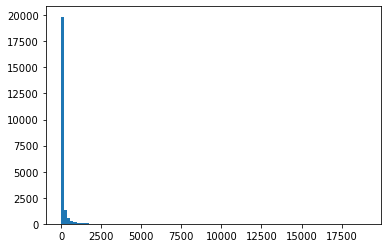

In [24]:
plt.hist(df_acts_users["Revenue"], bins=100)

(array([1.9864e+04, 1.3390e+03, 5.9600e+02, 2.4100e+02, 1.7800e+02,
        1.1600e+02, 4.4000e+01, 4.1000e+01, 3.6000e+01, 1.4000e+01,
        2.7000e+01, 2.1000e+01, 1.5000e+01, 1.7000e+01, 7.0000e+00,
        1.4000e+01, 6.0000e+00, 7.0000e+00, 3.0000e+00, 4.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.00

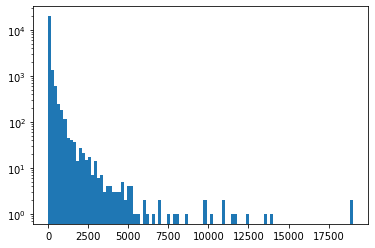

In [25]:
plt.hist(df_acts_users["Revenue"], bins=100, log=True)

(array([7.345e+03, 1.134e+03, 7.930e+02, 6.300e+02, 5.860e+02, 5.610e+02,
        4.700e+02, 6.300e+02, 5.320e+02, 4.830e+02, 3.950e+02, 3.630e+02,
        2.910e+02, 3.230e+02, 3.420e+02, 2.770e+02, 2.890e+02, 2.790e+02,
        3.160e+02, 2.980e+02, 2.820e+02, 3.860e+02, 2.920e+02, 3.240e+02,
        3.270e+02, 3.040e+02, 3.070e+02, 3.090e+02, 3.530e+02, 2.810e+02,
        2.610e+02, 2.470e+02, 2.420e+02, 2.410e+02, 2.410e+02, 2.420e+02,
        1.710e+02, 1.450e+02, 1.450e+02, 1.340e+02, 1.050e+02, 1.180e+02,
        1.300e+02, 8.000e+01, 8.100e+01, 6.400e+01, 7.400e+01, 6.800e+01,
        4.000e+01, 4.700e+01, 4.500e+01, 3.300e+01, 1.500e+01, 1.200e+01,
        8.000e+00, 1.900e+01, 1.100e+01, 5.000e+00, 6.000e+00, 8.000e+00,
        1.000e+01, 7.000e+00, 7.000e+00, 3.000e+00, 6.000e+00, 9.000e+00,
        4.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 6.000e+00,
        8.000e+00, 7.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+0

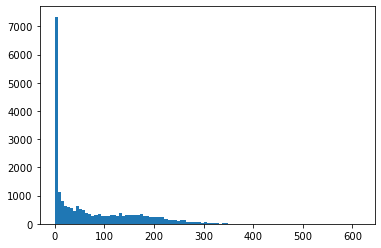

In [26]:
# histogram of days between reg and date
plt.hist(df_acts_users["DaysRegtoDate"] / pd.Timedelta(1, unit='d'), bins=100)

In [27]:
# careful to use 6 days since registration day is day 0
df_acts_one_week = df_acts_users.loc[df_acts_users.loc[:,"DaysRegtoDate"] <= pd.Timedelta(6,'D'),:]

In [28]:
df_acts_one_week["Revenue"].mean()

131.2853274336288

In [29]:
df_acts_one_week["Revenue"].median()

42.63

## Block B

In [30]:
# full time period
df_acts_users.groupby("Gender").agg("mean").drop("UserId", axis="columns").reset_index()

,Gender,Revenue
0,F,102.492762
1,M,143.921557


In [31]:
# one week since registration
df_acts_one_week.groupby("Gender").agg("mean").drop("UserId", axis="columns").reset_index()

,Gender,Revenue
0,F,112.653657
1,M,137.196272


In [32]:
import numpy as np

In [33]:
df_acts_one_week.groupby("Gender").agg(np.std, ddof=0).reset_index()[["Gender", "Revenue"]]

,Gender,Revenue
0,F,370.411594
1,M,396.771341


In [34]:
df_acts_one_week["Gender"].value_counts()

M    5576
F    1769
Name: Gender, dtype: int64

In [35]:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import CompareMeans

In [36]:
males = df_acts_one_week.loc[df_acts_one_week["Gender"] == "M","Revenue"]

In [37]:
females = df_acts_one_week.loc[df_acts_one_week["Gender"] == "F","Revenue"]

In [38]:
logging.info(f"For test of null hypothesis that means are equal (assuming an equal variance), p-value is {ztest(x1=males, x2=females)[1]}, reject null that means are equal")

In [39]:
# assume standard deviations are different?

In [40]:
df_country_diffs = df_acts_one_week.groupby(["Country", "Gender"]).agg("mean").reset_index()[["Gender", "Country", "Revenue"]]

In [41]:
df_country_diffs

,Gender,Country,Revenue
0,F,DE,87.698019
1,M,DE,110.190044
2,F,FR,133.803396
3,M,FR,169.612649
4,F,GB,137.221082
5,M,GB,147.662370
6,F,Other,63.176622
7,M,Other,104.133588
8,F,US,85.753758
9,M,US,143.903677


In [42]:
df_pivot = df_country_diffs.pivot(index="Country", columns="Gender").reset_index()
df_pivot.columns = ["Country", "Week1RevenueFemale", "Week1RevenueMale"]

In [43]:
df_pivot["Delta"] = df_pivot["Week1RevenueMale"] - df_pivot["Week1RevenueFemale"]

In [44]:
df_pivot

,Country,Week1RevenueFemale,Week1RevenueMale,Delta
0,DE,87.698019,110.190044,22.492025
1,FR,133.803396,169.612649,35.809253
2,GB,137.221082,147.662370,10.441289
3,Other,63.176622,104.133588,40.956966
4,US,85.753758,143.903677,58.149919


In [45]:
country = df_pivot.loc[df_pivot["Delta"] == df_pivot["Delta"].max(),"Country"]

In [46]:
logging.info(f"Country with biggest gender difference for revenue is {np.array(country)[0]}")

### Relationship between country, gender and week 1 revenue

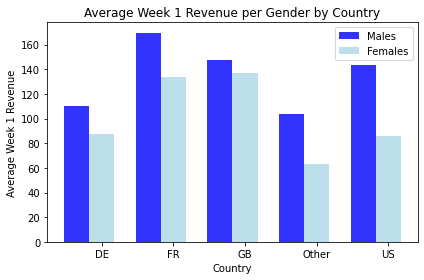

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = df_pivot.shape[0]
week1_rev_male = df_pivot["Week1RevenueMale"].tolist()
week1_rev_female = df_pivot["Week1RevenueFemale"].tolist()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, week1_rev_male, bar_width,
alpha=opacity,
color='b',
label='Males')

rects2 = plt.bar(index + bar_width, week1_rev_female, bar_width,
alpha=opacity,
color='lightblue',
label='Females')

plt.xlabel('Country')
plt.ylabel('Average Week 1 Revenue')
plt.title('Average Week 1 Revenue per Gender by Country')
plt.xticks(index + bar_width, df_pivot["Country"].tolist())
plt.legend()

plt.tight_layout()
plt.show()

### Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# calculate total week 1 revenue per user
agg_week1_rev = (
    df_acts_users.loc[df_acts_users.loc[:,"DaysRegtoDate"] <= pd.Timedelta(6,'D'),:]
    .groupby("UserId").agg("sum").reset_index()
)

In [50]:
agg_week1_rev.rename(columns={"Revenue": "TotalWeek1Revenue"}, inplace=True)

In [51]:
# calculate total day 1 revenue per user
agg_day1_rev = (
    df_acts_users.loc[df_acts_users.loc[:,"DaysRegtoDate"] == pd.Timedelta(0,'D'),:]
    .groupby("UserId").agg("sum").reset_index()
)
agg_day1_rev.rename(columns={"Revenue": "TotalDay1Revenue"}, inplace=True)

In [52]:
# check if UserID column duplicated
df_users["UserId"].duplicated().any()

False

In [53]:
# create final linear regression dataframe
from functools import reduce

dataframes = [agg_week1_rev, agg_day1_rev, df_users]

# calculate age age from df_users
df_users["DOB"] = pd.to_datetime(df_users["DOB"], format="%Y-%m-%d")
df_users["AgeInDays"] = pd.to_datetime(date.today(), format="%Y-%m-%d") - df_users["DOB"]
df_users["AgeInDays"] = df_users["AgeInDays"] / pd.Timedelta(1, unit='d')

df_lin_reg = reduce(lambda left, right: pd.merge(left, right,on="UserId", how="left"), dataframes)

In [54]:
# there are some users who have revenue within a week, but no revenue on day 1
df_acts_users.loc[df_acts_users["UserId"] == 3109386,:]

,UserId,Date,Revenue,Country,DOB,Gender,RegDate,DaysRegtoDate,DaysRegtoToday
1642,3109386,2017-03-03,20.0,GB,1986-05-16,F,2017-02-26,5 days,1709 days


In [55]:
df_lin_reg

,UserId,TotalWeek1Revenue,TotalDay1Revenue,Country,DOB,Gender,RegDate,AgeInDays
0,3109386,20.00,NaN,GB,1986-05-16,F,2017-02-26,12958.0
1,3114216,29.19,NaN,Other,1978-09-02,M,2017-01-23,15771.0
2,3114891,20.00,NaN,GB,1968-03-23,M,2017-01-16,19586.0
3,3115043,17.05,NaN,US,1985-11-01,F,2016-10-17,13154.0
4,3115226,25.00,NaN,GB,1967-07-04,M,2016-11-29,19849.0
...,...,...,...,...,...,...,...,...
5084,3347222,56.80,37.52,FR,1967-05-25,M,2017-03-22,19889.0
5085,3347251,30.00,30.00,GB,1981-06-11,F,2017-04-03,14758.0
5086,3347333,30.00,30.00,GB,1987-11-22,M,2017-01-27,12403.0
5087,3347367,17.05,17.05,US,1995-08-09,F,2017-04-04,9586.0


In [56]:
# fill nans with 0 for 1 day revenue
df_lin_reg["TotalDay1Revenue"].fillna(0, inplace=True)

In [57]:
# specify target
y = df_lin_reg["TotalWeek1Revenue"]

In [58]:
# specify features
X = df_lin_reg[["Gender", "AgeInDays", "Country", "TotalDay1Revenue"]]

In [59]:
X.dtypes

Gender               object
AgeInDays           float64
Country              object
TotalDay1Revenue    float64
dtype: object

In [60]:
# get dummy variables for categorical independent variables
X = pd.get_dummies(data=X, drop_first=True)

In [61]:
X

,AgeInDays,TotalDay1Revenue,Gender_M,Country_FR,Country_GB,Country_Other,Country_US
0,12958.0,0.00,0,0,1,0,0
1,15771.0,0.00,1,0,0,1,0
2,19586.0,0.00,1,0,1,0,0
3,13154.0,0.00,0,0,0,0,1
4,19849.0,0.00,1,0,1,0,0
...,...,...,...,...,...,...,...
5084,19889.0,37.52,1,1,0,0,0
5085,14758.0,30.00,0,0,1,0,0
5086,12403.0,30.00,1,0,1,0,0
5087,9586.0,17.05,0,0,0,0,1


In [62]:
# statsmodels Ordinary Least Squares
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalWeek1Revenue   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     916.6
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:56:35   Log-Likelihood:                -37824.
No. Observations:                5089   AIC:                         7.566e+04
Df Residuals:                    5081   BIC:                         7.572e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -13.3028     29.789  

In [63]:
def sklearn_lin_reg_p_val_calc(X, y):
    """
        replicate p values for sklearn, source: 
        stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
    X: pandas df of features
    y: pandas df of target
    """ 
    from sklearn.linear_model import LinearRegression
    
    model = LinearRegression().fit(X, y)

    params = np.append(model.intercept_,model.coef_)
    predictions = model.predict(X)

    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b


    p_values =[2*(1-stats.t.cdf(np.abs(i),(newX.shape[0]-newX.shape[1]))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    df_sklearn_p_vals = pd.DataFrame()
    vars_and_intcpt = ["Intercept"]
    vars_and_intcpt += X.columns.tolist()
    
    df_sklearn_p_vals["Variables"],df_sklearn_p_vals["Coefficients"],df_sklearn_p_vals["Standard Errors"],df_sklearn_p_vals["t values"],df_sklearn_p_vals["Probabilities"] = [vars_and_intcpt,params,sd_b,ts_b,p_values]

    return df_sklearn_p_vals

In [64]:
coefs_and_p_vals = sklearn_lin_reg_p_val_calc(X, y)

In [65]:
stat_sig_vars = coefs_and_p_vals.loc[coefs_and_p_vals["Probabilities"] < 0.05,"Variables"].to_list()

In [66]:
logging.info(f"The statistically significant variables at a 5% level are {stat_sig_vars}")

### Predict for 40-year-old French, German and British women having generated GBP 20 on RegDate

In [67]:
predict_X = pd.DataFrame(columns=X.columns)

In [68]:
predict_X

,AgeInDays,TotalDay1Revenue,Gender_M,Country_FR,Country_GB,Country_Other,Country_US


In [69]:
predict_X.loc[len(predict_X.index)] = [40*365, 20, 0, 1, 0, 0, 0] # french women
predict_X.loc[len(predict_X.index)] = [40*365, 20, 0, 0, 0, 0, 0] # german women
predict_X.loc[len(predict_X.index)] = [40*365, 20, 0, 0, 1, 0, 0] # british women

In [70]:
predict_X

,AgeInDays,TotalDay1Revenue,Gender_M,Country_FR,Country_GB,Country_Other,Country_US
0,14600,20,0,1,0,0,0
1,14600,20,0,0,0,0,0
2,14600,20,0,0,1,0,0


In [71]:
model = LinearRegression().fit(X, y)

In [72]:
model.predict(predict_X)

array([89.24146118, 52.61323108, 75.80737494])

In [73]:
french_women_1week_earn = round(model.predict(predict_X)[0], 2)
german_women_1week_earn = round(model.predict(predict_X)[1], 2)
british_women_1week_earn = round(model.predict(predict_X)[2], 2)

In [74]:
logging.info(f"The average 40-year-old French woman, having generated GBP 20 on registration date, would expect to earn {french_women_1week_earn} in her first week")
logging.info(f"The average 40-year-old German woman, having generated GBP 20 on registration date, would expect to earn {german_women_1week_earn} in her first week")
logging.info(f"The average 40-year-old British woman, having generated GBP 20 on registration date, would expect to earn {british_women_1week_earn} in her first week")